# Multiple Linear Regression NASCAR

In [1]:
%reset
import pandas as pd
import numpy as np

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [2]:
speed=pd.read_csv('NASCAR.csv')
speed

,Track,Bank,Length,TopQual,Cbank,Clength,CBank2,Clength2,CBL
0,ATLANTA MOTOR SPEEDWAY,24.0,1.54,197.478,4.69,0.018,22.0006,0.0003,0.0849
1,BRISTOL MOTOR SPEEDWAY,36.0,0.53,128.709,16.69,-0.992,278.5720,0.9839,-16.5554
2,CALIFORNIA SPEEDWAY,14.0,2.00,187.432,-5.31,0.478,28.1910,0.2286,-2.5385
3,CHICAGOLAND SPEEDWAY,18.0,1.50,188.147,-1.31,-0.022,1.7149,0.0005,0.0287
4,DARLINGTON RACEWAY,24.0,1.37,173.797,4.69,-0.152,22.0006,0.0231,-0.7125
5,DAYTONA INTERNATIONAL SPEEDWAY,31.0,2.50,210.364,11.69,0.978,136.6672,0.9567,11.4344
6,DOVER INTERNATIONAL SPEEDWAY,24.0,1.00,161.522,4.69,-0.522,22.0006,0.2724,-2.4480
7,HOMESTEAD-MIAMI SPEEDWAY,19.0,1.50,181.111,-0.31,-0.022,0.0958,0.0005,0.0068
8,INDIANAPOLIS MOTOR SPEEDWAY,9.0,2.50,186.293,-10.31,0.978,106.2863,0.9567,-10.0837
9,KANSAS SPEEDWAY,15.0,1.50,176.449,-4.31,-0.022,18.5720,0.0005,0.0944


In [3]:
from statsmodels.formula.api import ols

model1=ols('TopQual~Cbank+Clength',data=speed)
results1=model1.fit()
print(results1.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.752   
Dependent Variable: TopQual          AIC:                176.6934
Date:               2023-06-26 16:41 BIC:                179.8270
No. Observations:   21               Log-Likelihood:     -85.347 
Df Model:           2                F-statistic:        31.40   
Df Residuals:       18               Prob (F-statistic): 1.35e-06
R-squared:          0.777            Scale:              231.49  
------------------------------------------------------------------
            Coef.    Std.Err.     t     P>|t|    [0.025    0.975] 
------------------------------------------------------------------
Intercept  169.9176    3.3201  51.1779  0.0000  162.9422  176.8929
Cbank        1.2419    0.4105   3.0256  0.0073    0.3796    2.1043
Clength     38.0854    5.3123   7.1694  0.0000   26.9248   49.2461
-----------------------------------------------------------------
Omnibus:             

In [4]:
from statsmodels.stats.anova import anova_lm
anova_results1 = anova_lm(results1)
print(anova_results1)

            df        sum_sq       mean_sq          F    PR(>F)
Cbank      1.0   2640.077471   2640.077471  11.404768  0.003358
Clength    1.0  11898.462750  11898.462750  51.399704  0.000001
Residual  18.0   4166.800795    231.488933        NaN       NaN


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

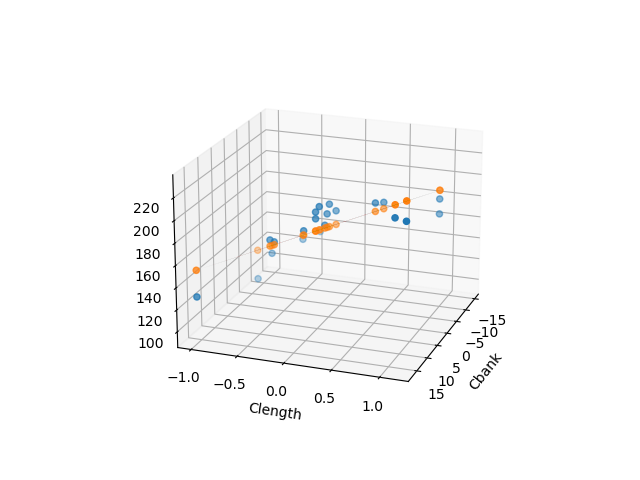

In [6]:
%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')

x=speed['Cbank']
y=speed['Clength']
z=speed['TopQual']
plt.xlabel("Cbank")
plt.ylabel("Clength")

ax.scatter(x,y,z)
ax.view_init(elev=20.,azim=20)

ax.scatter(x.values,y.values,results1.fittedvalues.values)

x1,y1=model1.exog_names[1:]

x_surf=np.arange(speed['Cbank'].min(), speed['Cbank'].max())
y_surf=np.arange(speed['Clength'].min(), speed['Clength'].max())
xS,yS=np.meshgrid(x_surf,y_surf)

exog=pd.DataFrame({x1: xS.ravel(), y1:yS.ravel()})
zS=results1.predict(exog=exog).values.reshape(xS.shape)
ax.plot_surface(xS,yS,zS,alpha=0.4,color='orange')

<AxesSubplot:>

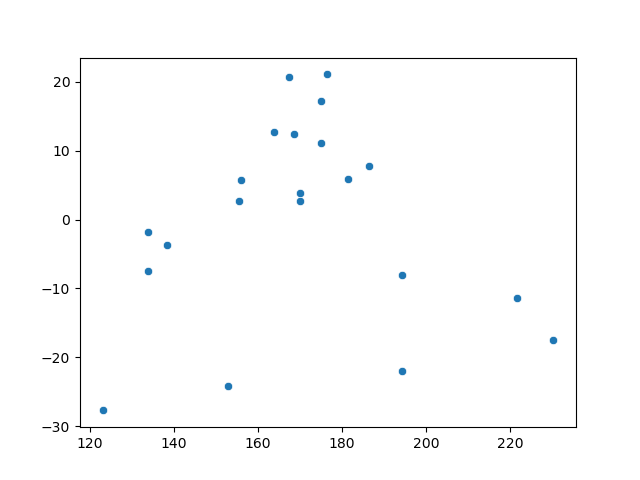

In [7]:
fig=plt.figure()
sns.scatterplot(x=results1.fittedvalues.values,y=results1.resid.values)

In [8]:
model2=ols('TopQual~Cbank+Clength+I(Cbank*Cbank)+Cbank*Clength+I(Clength*Clength)',data=speed)
results2=model2.fit()
print(results2.summary2())

                    Results: Ordinary least squares
Model:                 OLS                Adj. R-squared:       0.967   
Dependent Variable:    TopQual            AIC:                  136.3152
Date:                  2023-06-26 16:41   BIC:                  142.5823
No. Observations:      21                 Log-Likelihood:       -62.158 
Df Model:              5                  F-statistic:          119.6   
Df Residuals:          15                 Prob (F-statistic):   1.55e-11
R-squared:             0.976              Scale:                30.520  
------------------------------------------------------------------------
                      Coef.   Std.Err.    t     P>|t|   [0.025   0.975] 
------------------------------------------------------------------------
Intercept            182.8729   1.7063 107.1749 0.0000 179.2360 186.5098
Cbank                  1.4743   0.1516   9.7264 0.0000   1.1512   1.7974
Clength               43.8532   2.0538  21.3521 0.0000  39.4756  48.2308

In [9]:
model3=ols('TopQual~Cbank+Clength+I(Clength*Clength)',data=speed)
results3=model3.fit()
print(results3.summary2())

                    Results: Ordinary least squares
Model:                 OLS                Adj. R-squared:       0.970   
Dependent Variable:    TopQual            AIC:                  133.0383
Date:                  2023-06-26 16:41   BIC:                  137.2164
No. Observations:      21                 Log-Likelihood:       -62.519 
Df Model:              3                  F-statistic:          218.0   
Df Residuals:          17                 Prob (F-statistic):   9.16e-14
R-squared:             0.975              Scale:                27.872  
------------------------------------------------------------------------
                      Coef.   Std.Err.    t     P>|t|   [0.025   0.975] 
------------------------------------------------------------------------
Intercept            182.6518   1.5972 114.3550 0.0000 179.2819 186.0217
Cbank                  1.4639   0.1437  10.1854 0.0000   1.1607   1.7672
Clength               44.1705   1.9176  23.0339 0.0000  40.1246  48.2163

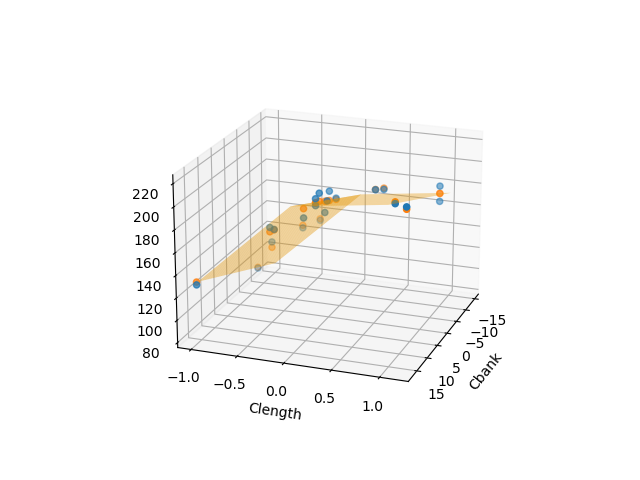

In [10]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')

x=speed['Cbank']
y=speed['Clength']
z=speed['TopQual']
plt.xlabel("Cbank")
plt.ylabel("Clength")

ax.scatter(x,y,z)
ax.view_init(elev=20.,azim=20)

ax.scatter(x.values,y.values,results3.fittedvalues.values)

x1,y1,yy=model3.exog_names[1:]

x_surf=np.arange(speed['Cbank'].min(), speed['Cbank'].max())
y_surf=np.arange(speed['Clength'].min(), speed['Clength'].max())
xS,yS=np.meshgrid(x_surf,y_surf)

exog=pd.DataFrame({x1: xS.ravel(), y1:yS.ravel()})
zS=results3.predict(exog=exog).values.reshape(xS.shape)
ax.plot_surface(xS,yS,zS,alpha=0.4,color='orange')

In [11]:
model4=ols('TopQual~Bank+Length+I(Length*Length)',data=speed)
results4=model4.fit()
print(results4.summary2())

                   Results: Ordinary least squares
Model:                 OLS               Adj. R-squared:      0.970   
Dependent Variable:    TopQual           AIC:                 133.0383
Date:                  2023-06-26 16:41  BIC:                 137.2164
No. Observations:      21                Log-Likelihood:      -62.519 
Df Model:              3                 F-statistic:         218.0   
Df Residuals:          17                Prob (F-statistic):  9.16e-14
R-squared:             0.975             Scale:               27.872  
----------------------------------------------------------------------
                    Coef.   Std.Err.    t     P>|t|   [0.025   0.975] 
----------------------------------------------------------------------
Intercept           11.8199   7.7317   1.5287 0.1447  -4.4927  28.1324
Bank                 1.4639   0.1437  10.1854 0.0000   1.1607   1.7672
Length             143.1668   9.3133  15.3723 0.0000 123.5175 162.8161
I(Length * Length) -32.521

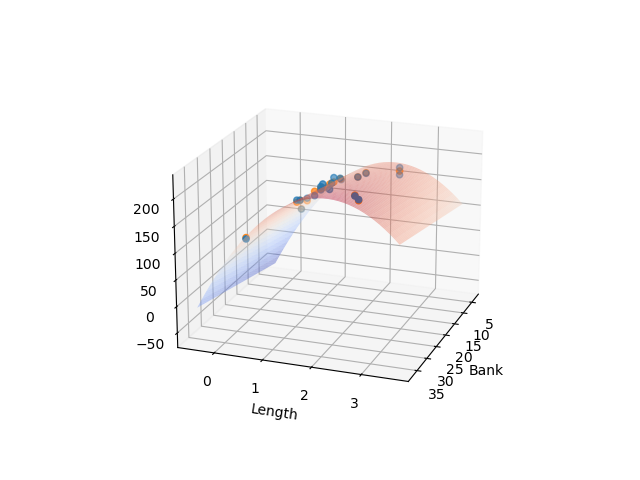

In [12]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')

x=speed['Bank']
y=speed['Length']
z=speed['TopQual']
plt.xlabel("Bank")
plt.ylabel("Length")

ax.scatter(x,y,z)
ax.view_init(elev=20.,azim=20)

ax.scatter(x.values,y.values,results4.fittedvalues.values)

x1,y1,yy=model4.exog_names[1:]

x_surf=np.arange(speed['Bank'].min()-1, speed['Bank'].max()+1,.1)
y_surf=np.arange(speed['Length'].min()-1, speed['Length'].max()+1,.1)
xS,yS=np.meshgrid(x_surf,y_surf)

exog=pd.DataFrame({x1: xS.ravel(), y1:yS.ravel()})
zS=results4.predict(exog=exog).values.reshape(xS.shape)
ax.plot_surface(xS,yS,zS,alpha=0.4,cmap=plt.cm.coolwarm)

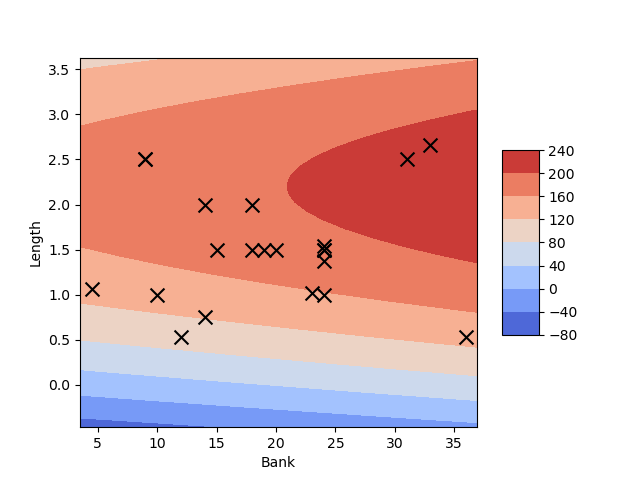

In [13]:
fig, ax = plt.subplots(1, 1)

contour=ax.contourf(xS,yS,zS,cmap="coolwarm")
fig.colorbar(contour,shrink=0.5,aspect=5)
plt.xlabel("Bank")
plt.ylabel("Length")
ax.scatter(x,y,marker='x',color='black',s=100,label="Raw Data")